# Image Preprocessing
This was conducted locally to save resources on google colab.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image

# Define paths
input_folder = "../../Datasets/UTKFace/UTKFace"
output_folder = "../../Datasets/UTKFace/processed2classes"
os.makedirs(output_folder, exist_ok=True)

# Initialize lists to store image paths and labels
processed_image_paths = []
age_labels = []
gender_labels = []

# Define bins and labels for age categorization
bins = [21, 50, 117]  
labels_age = [0, 1] 

# Preprocess each image and extract labels
for filename in tqdm(os.listdir(input_folder)):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        # Get image path and labels from filename
        image_path = os.path.join(input_folder, filename)
        temp = filename.split('_')
        age = int(temp[0])
        gender = int(temp[1])

        # Load and preprocess the image
        img = Image.open(image_path).convert('L')  # Convert to grayscale
        img = img.resize((128, 128))  # Resize image to 128x128
        img_array = np.array(img).astype('float32') / 255.0  # Normalize pixel values
        img_array = img_array.reshape(128, 128, 1)  # Add channel dimension

        # Save processed image as .npy file
        processed_filename = f"{os.path.splitext(filename)[0]}.npy"
        processed_image_path = os.path.join(output_folder, processed_filename)
        np.save(processed_image_path, img_array)

        # Append paths and labels to lists
        processed_image_paths.append(processed_image_path)
        age_labels.append(age)
        gender_labels.append(gender)

# Create a DataFrame with image paths and labels
df = pd.DataFrame({
    'image': processed_image_paths,
    'age': age_labels,
    'gender': gender_labels
})

df = df[(df['age'] >= 21) & (df['age'] <= 117)]

# Categorize age labels into bins
df['age_labels'] = pd.cut(df['age'], bins=bins, labels=labels_age, right=False)

# Save the DataFrame as a CSV for easy loading in Colab
df.to_csv(os.path.join(output_folder, "processed_labels2classes.csv"), index=False)

print("Preprocessing complete. Images and labels saved.")


100%|██████████| 25800/25800 [02:29<00:00, 172.30it/s]


Preprocessing complete. Images and labels saved.


In [ ]:
import os
import zipfile

# Define paths
npy_folder = "../../Datasets/UTKFace/processed2classes"
zip_file_path = "../../Datasets/UTKFace/processed_images2classes.zip"

# Create a zip file
with zipfile.ZipFile(zip_file_path, 'w') as zipf:
    for root, dirs, files in os.walk(npy_folder):
        for file in files:
            if file.endswith('.npy'):
                file_path = os.path.join(root, file)
                zipf.write(file_path, os.path.relpath(file_path, npy_folder)) 
print("Files zipped successfully!")


Files zipped successfully!


In [ ]:
import zipfile
import os
import numpy as np
import pandas as pd

# Define paths
zip_file_path = "../../Datasets/UTKFace/processed_images2classes.zip" 
unzip_folder = "../../Datasets/UTKFace/processed_images2classes"
os.makedirs(unzip_folder, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_folder)

print("Files unzipped successfully!")


Files unzipped successfully!


In [18]:

import pandas as pd
import numpy as np
import os

df = pd.read_csv("../../Datasets/UTKFace/processed2classes/processed_labels2classes.csv")

# Load images and labels into numpy arrays
X = np.array([np.load(os.path.join(unzip_folder, os.path.basename(img_path))) for img_path in df['image']])
y_age = np.array(df['age_labels'])
y_gender = np.array(df['gender'])

print("Data loaded successfully!")


Data loaded successfully!


In [ ]:
from sklearn.model_selection import train_test_split

# Define labels
y_age = df['age_labels'].values  # Age labels
y_gender = df['gender'].values  # Gender labels

X_train, X_temp, y_age_train, y_age_temp, y_gender_train, y_gender_temp = train_test_split(X, y_age, y_gender, test_size=0.3, random_state=42)
X_val, X_test, y_age_val, y_age_test, y_gender_val, y_gender_test = train_test_split(X_temp, y_age_temp, y_gender_temp, test_size=0.5, random_state=42)

# Check the shapes of the splits to confirm
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)


Training set shape: (13181, 128, 128, 1)
Validation set shape: (2825, 128, 128, 1)
Test set shape: (2825, 128, 128, 1)


In [22]:
df

,image,age,gender,age_labels
0,../../Datasets/UTKFace/processed2classes\100_0...,100,0,1
1,../../Datasets/UTKFace/processed2classes\100_0...,100,0,1
2,../../Datasets/UTKFace/processed2classes\100_1...,100,1,1
3,../../Datasets/UTKFace/processed2classes\100_1...,100,1,1
4,../../Datasets/UTKFace/processed2classes\100_1...,100,1,1
...,...,...,...,...
18826,../../Datasets/UTKFace/processed2classes\99_1_...,99,1,1
18827,../../Datasets/UTKFace/processed2classes\99_1_...,99,1,1
18828,../../Datasets/UTKFace/processed2classes\99_1_...,99,1,1
18829,../../Datasets/UTKFace/processed2classes\99_1_...,99,1,1


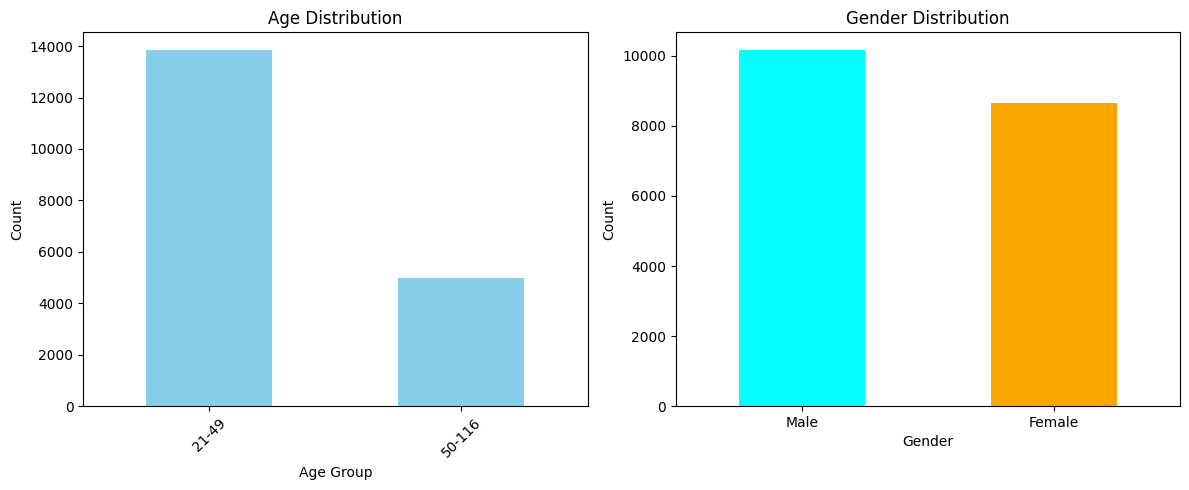

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_distribution(df, bins=None, labels=None):

    if bins and labels:
        df['age_labels'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

    plt.figure(figsize=(12, 5))

    # Age distribution
    plt.subplot(1, 2, 1)
    df['age_labels'].value_counts(sort=False).plot(kind='bar', color='skyblue')
    plt.title('Age Distribution')
    plt.xlabel('Age Group')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Gender distribution
    plt.subplot(1, 2, 2)
    df['gender'].value_counts().plot(kind='bar', color=('cyan', 'orange'))
    plt.title('Gender Distribution')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.xticks([0, 1], ['Male', 'Female'], rotation=0)

    plt.tight_layout()
    plt.show()



bins = [21, 50, 117]  
labels = ["21-49", "50-116"]  

plot_distribution(df, bins=bins, labels=labels)
